# **BASE MODEL**

## CNN model with same filter size for all the layers and two droupout layers with dropout rate of 0.2.



In [2]:
# import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping






In [9]:
model = Sequential()
initializer = tf.keras.initializers.HeUniform()
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same", input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.summary()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model for 20 epochs with a batch size of 25

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels), batch_size=25, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Evaluate the model on validation data
validation_loss, validation_acc = model.evaluate(val_images, val_labels)

# Print the test and validation accuracy
print('Test accuracy:', test_acc)
print('Validation accuracy:', validation_acc)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 128)     0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     1

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/20
311/311 [==============================] - 74s 198ms/step - loss: 0.5165 - accuracy: 0.8239 - val_loss: 1.1200 - val_accuracy: 0.6411
Epoch 2/20
311/311 [==============================] - 60s 192ms/step - loss: 0.3020 - accuracy: 0.8887 - val_loss: 0.3943 - val_accuracy: 0.8515
Epoch 3/20
311/311 [==============================] - 59s 191ms/step - loss: 0.2167 - accuracy: 0.9204 - val_loss: 0.4043 - val_accuracy: 0.8633
Epoch 4/20
311/311 [==============================] - 59s 190ms/step - loss: 0.1231 - accuracy: 0.9552 - val_loss: 1.5273 - val_accuracy: 0.6529
Epoch 5/20
311/311 [==============================] - 59s 190ms/step - loss: 0.0667 - accuracy: 0.9779 - val_loss: 0.4884 - val_accuracy: 0.9067
Epoch 6/20
311/311 [==============================] - 59s 190ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.5482 - val_accuracy: 0.8932
Epoch 7/20
311/311 [==============================] - 59s 189ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.5859 - val_ac

'RMSprop' is the optimizer,'sparse_categorical_crossentropy' is the loss function, and accuracy is the metric used in the model's compilation.On test data and validation data, the model achieves accuracy of about 91%.  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 24.3 MB/s eta 0:00:00


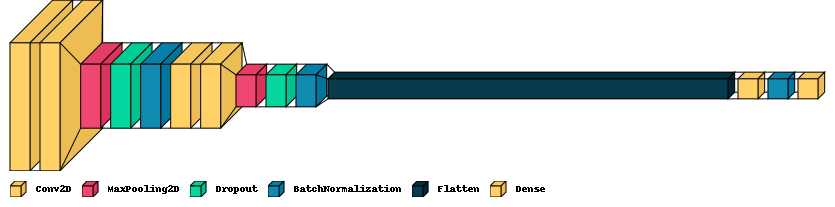

In [10]:
#visualize the CNN Model that we created

#Install Visual Keras
!pip install visualkeras

# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=0.5,legend=True)

This model consists of 14 layers. There are four 2D convolutional layers with 128 filters, each having (3,3) size, the activation function 'relu', and the same padding. Two Max-pooling layers of pool size (2,2) are used in the layers. The model includes three batch normalization layers, two fully connected layers, and two dropout layers with a dropout rate of 0.2. One flatten is used to convert 2D features to 1D features.

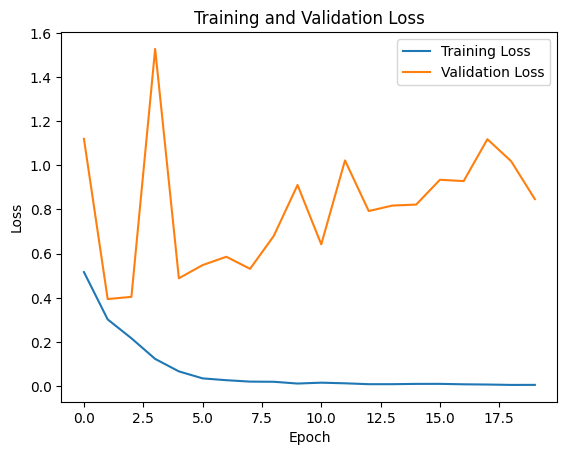

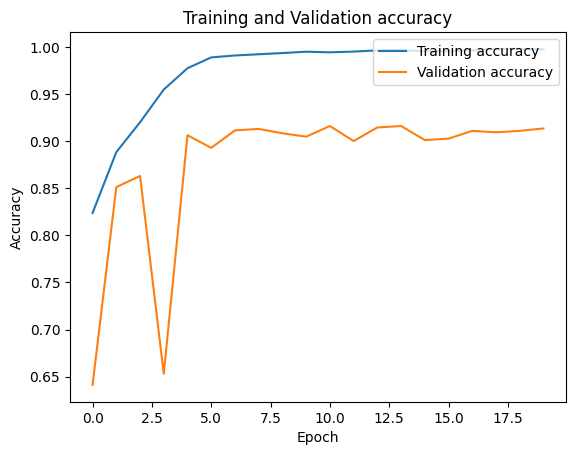

In [11]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()
